## <span style="color:red">Initializing Packages and Importing Data</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
train=pd.read_excel("C:/Users/Aakash Sharma/Desktop/Projects/predict-book-price_Participants_Data-20190926T094854Z-001/Participants_Data/Data_Train.xlsx")
test=pd.read_excel("C:/Users/Aakash Sharma/Desktop/Projects/predict-book-price_Participants_Data-20190926T094854Z-001/Participants_Data/Data_Test.xlsx")

In [3]:
train.shape

(6237, 9)

In [4]:
test.shape

(1560, 8)

In [5]:
train.describe(include='all').head(2)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
count,6237,6237,6237,6237,6237,6237,6237,6237,6237.0
unique,5568,3679,3370,36,342,5549,345,11,NaN


In [6]:
train.head()


,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [7]:
test.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [8]:
#For getting detailed report about the data - whether any missing value etc. 
!pip install pandas_profiling
import pandas_profiling as pd_prof
pd_prof.ProfileReport(train)

In [9]:
# By making of Distribution Graph we can assume that there is some skewness in the Price
print ("Skew is:", train.Price.skew())
print("Kurtosis: %f" % train.Price.kurt())

Skew is: 6.749865573718627
Kurtosis: 80.843452


'plt.xlabel("Item_Outlet_Sales")\nplt.ylabel("Number of Sales")\nplt.title("Item_Outlet_Sales Distribution")'

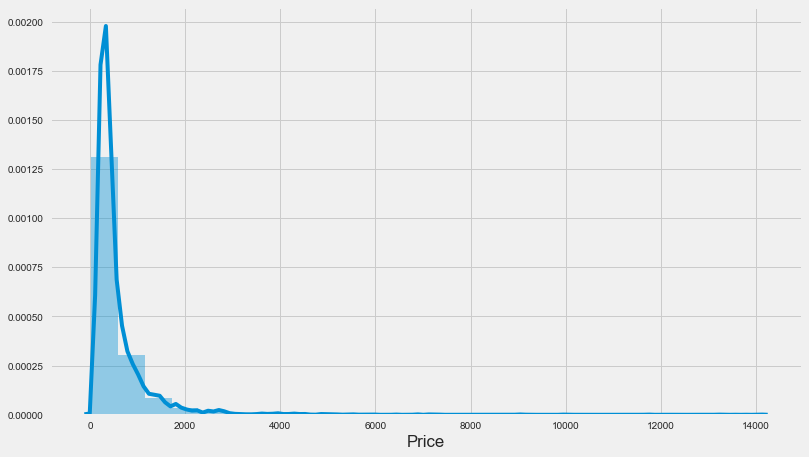

In [10]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(train.Price, bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
'''plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")'''

### Data Pre-Processing

In [11]:
#Join Train and Test Dataset

train['source']='train'
test['source']='test'
    
data = pd.concat([train,test], ignore_index = True)
data.to_csv("C:/Users/Aakash Sharma/Desktop/Projects/predict-book-price_Participants_Data-20190926T094854Z-001/Participants_Data/data.csv",index=False)
print(train.shape, test.shape, data.shape)

C:\Users\Aakash Sharma\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


(6237, 10) (1560, 9) (7797, 10)


In [12]:
data.head()

,Author,BookCategory,Edition,Genre,Price,Ratings,Reviews,Synopsis,Title,source
0,Chris Kuzneski,Action & Adventure,"Paperback,– 10 Mar 2016",Action & Adventure (Books),220.00,8 customer reviews,4.0 out of 5 stars,THE HUNTERS return in their third brilliant no...,The Prisoner's Gold (The Hunters 3),train
1,Arun Khopkar,"Biographies, Diaries & True Accounts","Paperback,– 7 Nov 2012",Cinema & Broadcast (Books),202.93,14 customer reviews,3.9 out of 5 stars,A layered portrait of a troubled genius for wh...,Guru Dutt: A Tragedy in Three Acts,train
2,Thomas Hobbes,Humour,"Paperback,– 25 Feb 1982",International Relations,299.00,6 customer reviews,4.8 out of 5 stars,"""During the time men live without a common Pow...",Leviathan (Penguin Classics),train
3,Agatha Christie,"Crime, Thriller & Mystery","Paperback,– 5 Oct 2017",Contemporary Fiction (Books),180.00,13 customer reviews,4.1 out of 5 stars,A handful of grain is found in the pocket of a...,A Pocket Full of Rye (Miss Marple),train
4,Editors of Life,"Arts, Film & Photography","Hardcover,– 10 Oct 2006",Photography Textbooks,965.62,1 customer review,5.0 out of 5 stars,"For seven decades, ""Life"" has been thrilling t...",LIFE 70 Years of Extraordinary Photography,train


In [13]:
data.isnull().sum()

Author             0
BookCategory       0
Edition            0
Genre              0
Price           1560
Ratings            0
Reviews            0
Synopsis           0
Title              0
source             0
dtype: int64

price shows 1560 null values because we merge the two dataset,i.e train and test dataset , in which test dataset does not have price column.

KEY OBSERVATIONS
- No null values in the dataset to treat.

- Some books have multiple authors in the Author column which needs to be processed amd seperated.

- Edition Column can be split in to 3 different features. (Type, Month and Year)

- The Reviews and Ratings columms are misslabelled.

- Reviews and Ratings, both needs to cleaned to represent integer and float values respectively.

- Like authors , a book may belong to multiple categories and genres. Thus we will need to split both the Genre and Category columns.

`Reviews`

In [14]:
rev=[]
for i in data.Reviews:
    rev.append(i.split(" ")[0])
data['Reviews']=rev

In [15]:
data['Reviews']=data['Reviews'].astype(str).astype(float)

`Ratings`

In [16]:
rat=[]
for i in data.Ratings:
    r = i.split(" ")[0]
    rat.append(r.strip(',').replace(",", ""))
data['Ratings']=rat

In [17]:
data['Ratings']=data['Ratings'].astype(int)

`Edition`

In [18]:
# Seperate Type

ed_type = [i.split(",– ")[0].strip().upper() for i in data.Edition]
data['edition_type']=ed_type

In [19]:
# seperate Month


ed_date = [i.split(",– ")[1].strip().upper() for i in data.Edition]
ed_month_year = [i.split()[-2:] for i in ed_date]

for i in range(len(ed_month_year)):
    if len(ed_month_year[i]) == 1:
        ed_month_year[i].insert(0,'NA')
    
months = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','NA']
ed_month = [ed_month_year[i][0].upper() if ed_month_year[i][0] in months else 'NA' for i in range(len(ed_month_year))]
data['edition_month']=ed_month

In [20]:
# seperate year

ed_year = [int(ed_month_year[i][1].strip()) if ed_month_year[i][1].isdigit() else 0 for i in range(len(ed_month_year))]
data['edition_year']=ed_year

In [21]:
data.edition_year.isnull().sum()

0

`Titile`

In [22]:
data.Title = [i.upper() for i in data.Title]

`Synopsis`

In [23]:
data['Synopsis'] = TfidfVectorizer().fit_transform(data['Synopsis'])

`Author`

In [24]:
author_list = [i.split(",") for i in data.Author]
max=1
for i in author_list:
    if len(i)>max:
        max=len(i)
print("maximum no. of books per book is :", max)

for i in range(len(author_list)):
    if len(author_list[i]) == max:
        print(i) 
all_authors = [author.strip().upper() for listin in author_list for author in listin]

maximum no. of books per book is : 7
7008


In [25]:
# So, we need to extract all the 7 authors.

a1=[]
a2=[]
a3=[]
a4=[]
a5=[]
a6=[]
a7=[]
for i in data.Author:
    try:
        a1.append(i.split(",")[0].strip().upper())
    except:
        a1.append("NA")
    try:
        a2.append(i.split(",")[1].strip().upper())
    except:
        a2.append("NA")
    try:
        a3.append(i.split(",")[2].strip().upper())
    except:
        a3.append("NA")
    try:
        a4.append(i.split(",")[3].strip().upper())
    except:
        a4.append("NA")
    try:
        a5.append(i.split(",")[4].strip().upper())
    except:
        a5.append("NA")
    try:
        a6.append(i.split(",")[5].strip().upper())
    except:
        a6.append("NA")
    try:
        a7.append(i.split(",")[6].strip().upper())
    except:
        a7.append("NA")

data["Author1"]=a1
data["Author2"]=a2
data["Author3"]=a3
data["Author4"]=a4
data["Author5"]=a5
data["Author6"]=a6
data["Author7"]=a7

all_authors.append('NA')

`Book Category`

In [26]:
book_list = [i.split(",") for i in data.BookCategory]
max=1
for i in book_list:
    if len(i)>max:
        max=len(i)
print("maximum no. of bookscategory per book is :", max)

all_categories = [cat.strip().upper() for listin in book_list for cat in listin]

maximum no. of bookscategory per book is : 2


so we need to extract all the 2 books

In [27]:
b1=[]
b2=[]
for i in data.BookCategory:
    try:
        b1.append(i.split(",")[0].strip().upper())
    except:
        b1.append("NA")
    try:
        b2.append(i.split(",")[1].strip().upper())
    except:
        b2.append("NA") 
        
data['BookCategory1']=b1
data['BookCategory2']=b2

all_categories.append('NA')


`Genre`

In [28]:
genre_list = [i.split(",") for i in data.Genre]
max=1
for i in genre_list:
    if len(i)>max:
        max=len(i)
print("maximum no. of Genre per book is :", max)

all_genres = [genre.strip().upper() for listin in genre_list for genre in listin]

maximum no. of Genre per book is : 2


so, we need to extract all the 2 Genre 

In [29]:
g1=[]
g2=[]
for i in data.Genre:
    try:
        g1.append(i.split(",")[0].strip().upper())
    except:
        g1.append("NA")
    try:
        g2.append(i.split(",")[1].strip().upper())
    except:
        g2.append("NA") 
        
data['Genre1']=g1
data['Genre2']=g2

all_genres.append('NA')


In [30]:
data.head()

,Author,BookCategory,Edition,Genre,Price,Ratings,Reviews,Synopsis,Title,source,...,Author2,Author3,Author4,Author5,Author6,Author7,BookCategory1,BookCategory2,Genre1,Genre2
0,Chris Kuzneski,Action & Adventure,"Paperback,– 10 Mar 2016",Action & Adventure (Books),220.00,8,4.0,"(0, 7803)\t0.05740343646906161\n (0, 7222)\...",THE PRISONER'S GOLD (THE HUNTERS 3),train,...,NA,NA,NA,NA,NA,NA,ACTION & ADVENTURE,NA,ACTION & ADVENTURE (BOOKS),NA
1,Arun Khopkar,"Biographies, Diaries & True Accounts","Paperback,– 7 Nov 2012",Cinema & Broadcast (Books),202.93,14,3.9,"(0, 7803)\t0.05740343646906161\n (0, 7222)\...",GURU DUTT: A TRAGEDY IN THREE ACTS,train,...,NA,NA,NA,NA,NA,NA,BIOGRAPHIES,DIARIES & TRUE ACCOUNTS,CINEMA & BROADCAST (BOOKS),NA
2,Thomas Hobbes,Humour,"Paperback,– 25 Feb 1982",International Relations,299.00,6,4.8,"(0, 7803)\t0.05740343646906161\n (0, 7222)\...",LEVIATHAN (PENGUIN CLASSICS),train,...,NA,NA,NA,NA,NA,NA,HUMOUR,NA,INTERNATIONAL RELATIONS,NA
3,Agatha Christie,"Crime, Thriller & Mystery","Paperback,– 5 Oct 2017",Contemporary Fiction (Books),180.00,13,4.1,"(0, 7803)\t0.05740343646906161\n (0, 7222)\...",A POCKET FULL OF RYE (MISS MARPLE),train,...,NA,NA,NA,NA,NA,NA,CRIME,THRILLER & MYSTERY,CONTEMPORARY FICTION (BOOKS),NA
4,Editors of Life,"Arts, Film & Photography","Hardcover,– 10 Oct 2006",Photography Textbooks,965.62,1,5.0,"(0, 7803)\t0.05740343646906161\n (0, 7222)\...",LIFE 70 YEARS OF EXTRAORDINARY PHOTOGRAPHY,train,...,NA,NA,NA,NA,NA,NA,ARTS,FILM & PHOTOGRAPHY,PHOTOGRAPHY TEXTBOOKS,NA


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7797 entries, 0 to 7796
Data columns (total 24 columns):
Author           7797 non-null object
BookCategory     7797 non-null object
Edition          7797 non-null object
Genre            7797 non-null object
Price            6237 non-null float64
Ratings          7797 non-null int32
Reviews          7797 non-null float64
Synopsis         7797 non-null object
Title            7797 non-null object
source           7797 non-null object
edition_type     7797 non-null object
edition_month    7797 non-null object
edition_year     7797 non-null int64
Author1          7797 non-null object
Author2          7797 non-null object
Author3          7797 non-null object
Author4          7797 non-null object
Author5          7797 non-null object
Author6          7797 non-null object
Author7          7797 non-null object
BookCategory1    7797 non-null object
BookCategory2    7797 non-null object
Genre1           7797 non-null object
Genre2           77

In [32]:
data=data.drop(['Author','BookCategory','Edition','Genre','Synopsis'],axis=1)

In [33]:
data.head()

,Price,Ratings,Reviews,Title,source,edition_type,edition_month,edition_year,Author1,Author2,Author3,Author4,Author5,Author6,Author7,BookCategory1,BookCategory2,Genre1,Genre2
0,220.00,8,4.0,THE PRISONER'S GOLD (THE HUNTERS 3),train,PAPERBACK,MAR,2016,CHRIS KUZNESKI,NA,NA,NA,NA,NA,NA,ACTION & ADVENTURE,NA,ACTION & ADVENTURE (BOOKS),NA
1,202.93,14,3.9,GURU DUTT: A TRAGEDY IN THREE ACTS,train,PAPERBACK,NOV,2012,ARUN KHOPKAR,NA,NA,NA,NA,NA,NA,BIOGRAPHIES,DIARIES & TRUE ACCOUNTS,CINEMA & BROADCAST (BOOKS),NA
2,299.00,6,4.8,LEVIATHAN (PENGUIN CLASSICS),train,PAPERBACK,FEB,1982,THOMAS HOBBES,NA,NA,NA,NA,NA,NA,HUMOUR,NA,INTERNATIONAL RELATIONS,NA
3,180.00,13,4.1,A POCKET FULL OF RYE (MISS MARPLE),train,PAPERBACK,OCT,2017,AGATHA CHRISTIE,NA,NA,NA,NA,NA,NA,CRIME,THRILLER & MYSTERY,CONTEMPORARY FICTION (BOOKS),NA
4,965.62,1,5.0,LIFE 70 YEARS OF EXTRAORDINARY PHOTOGRAPHY,train,HARDCOVER,OCT,2006,EDITORS OF LIFE,NA,NA,NA,NA,NA,NA,ARTS,FILM & PHOTOGRAPHY,PHOTOGRAPHY TEXTBOOKS,NA


In [34]:
data.describe()

,Price,Ratings,Reviews,edition_year
count,6237.000000,7797.000000,7797.000000,7797.000000
mean,560.707516,35.520841,4.295845,2004.152366
std,690.110657,153.020897,0.663513,124.809350
min,25.000000,1.000000,1.000000,0.000000
25%,249.180000,2.000000,4.000000,2010.000000
50%,373.000000,6.000000,4.400000,2014.000000
75%,599.000000,21.000000,4.800000,2017.000000
max,14100.000000,6090.000000,5.000000,2019.000000


In [35]:
from sklearn.preprocessing import LabelEncoder

le_Title = LabelEncoder()
all_titles = list(set(data.Title))
le_Title.fit(all_titles)

le_Edition_Type = LabelEncoder()
all_etypes = list(set(data.edition_type))
le_Edition_Type.fit(all_etypes)


le_Edition_Month = LabelEncoder()
all_em = list(set(data.edition_month))
le_Edition_Month.fit(all_em)

le_Author = LabelEncoder()
all_Authors = list(set(all_authors))
le_Author.fit(all_Authors)

le_Genre = LabelEncoder()
all_Genres = list(set(all_genres))
le_Genre.fit(all_Genres)

le_Category = LabelEncoder()
all_Categories = list(set(all_categories))
le_Category.fit(all_Categories)

LabelEncoder()

In [36]:
# LabelEncoding

le = LabelEncoder()
data['Title'] = le_Title.transform(data['Title'])

In [37]:
data['edition_type'] = le_Edition_Type.transform(data['edition_type'])

In [38]:
data['edition_month'] = le_Edition_Month.transform(data['edition_month'])

In [39]:
data['Author1'] = le_Author.transform(data['Author1'])

In [40]:
data['Author2'] = le_Author.transform(data['Author2'])

In [41]:
data['Author3'] = le_Author.transform(data['Author3'])

In [42]:
data['Author4'] = le_Author.transform(data['Author4'])

In [43]:
data['Author5'] = le_Author.transform(data['Author5'])

In [44]:
data['Author6'] = le_Author.transform(data['Author6'])

In [45]:
data['Author7'] = le_Author.transform(data['Author7'])

In [46]:
data['BookCategory1'] = le_Category.transform(data['BookCategory1'])

In [47]:
data['BookCategory2'] = le_Category.transform(data['BookCategory2'])

In [48]:
data['Genre1'] = le_Genre.transform(data['Genre1'])

In [49]:
data['Genre2'] = le_Genre.transform(data['Genre2'])

In [50]:
data.head()

,Price,Ratings,Reviews,Title,source,edition_type,edition_month,edition_year,Author1,Author2,Author3,Author4,Author5,Author6,Author7,BookCategory1,BookCategory2,Genre1,Genre2
0,220.00,8,4.0,5802,train,13,7,2016,797,2947,2947,2947,2947,2947,2947,0,12,0,262
1,202.93,14,3.9,2120,train,13,10,2012,391,2947,2947,2947,2947,2947,2947,2,6,80,262
2,299.00,6,4.8,2984,train,13,3,1982,4354,2947,2947,2947,2947,2947,2947,8,12,211,262
3,180.00,13,4.1,189,train,13,11,2017,78,2947,2947,2947,2947,2947,2947,5,16,98,262
4,965.62,1,5.0,2987,train,8,11,2006,1221,2947,2947,2947,2947,2947,2947,1,7,284,262


## Exporting data

In [52]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Price','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("C:/Users/Aakash Sharma/Desktop/Projects/predict-book-price_Participants_Data-20190926T094854Z-001/Participants_Data/train_modified.csv",index=False)
test.to_csv("C:/Users/Aakash Sharma/Desktop/Projects/predict-book-price_Participants_Data-20190926T094854Z-001/Participants_Data/test_modified.csv",index=False)

C:\Users\Aakash Sharma\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Model, Predict and Solve the problem

In [181]:
train_new = pd.read_csv("C:/Users/Aakash Sharma/Desktop/Projects/predict-book-price_Participants_Data-20190926T094854Z-001/Participants_Data/train_modified.csv")
test_new = pd.read_csv("C:/Users/Aakash Sharma/Desktop/Projects/predict-book-price_Participants_Data-20190926T094854Z-001/Participants_Data/test_modified.csv")

In [182]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 18 columns):
Price            6237 non-null float64
Ratings          6237 non-null int64
Reviews          6237 non-null float64
Title            6237 non-null int64
edition_type     6237 non-null int64
edition_month    6237 non-null int64
edition_year     6237 non-null int64
Author1          6237 non-null int64
Author2          6237 non-null int64
Author3          6237 non-null int64
Author4          6237 non-null int64
Author5          6237 non-null int64
Author6          6237 non-null int64
Author7          6237 non-null int64
BookCategory1    6237 non-null int64
BookCategory2    6237 non-null int64
Genre1           6237 non-null int64
Genre2           6237 non-null int64
dtypes: float64(2), int64(16)
memory usage: 877.2 KB


In [183]:
test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 17 columns):
Ratings          1560 non-null int64
Reviews          1560 non-null float64
Title            1560 non-null int64
edition_type     1560 non-null int64
edition_month    1560 non-null int64
edition_year     1560 non-null int64
Author1          1560 non-null int64
Author2          1560 non-null int64
Author3          1560 non-null int64
Author4          1560 non-null int64
Author5          1560 non-null int64
Author6          1560 non-null int64
Author7          1560 non-null int64
BookCategory1    1560 non-null int64
BookCategory2    1560 non-null int64
Genre1           1560 non-null int64
Genre2           1560 non-null int64
dtypes: float64(1), int64(16)
memory usage: 207.3 KB


In [184]:
#Dividing the data into test and train datasets
X = train_new.drop(['Price'],axis=1)
y = train_new.Price
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [185]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4989, 17)
(1248, 17)
(4989,)
(1248,)


In [186]:
'''# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.fit_transform(X_test)

test_new = sc.fit_transform(test_new)'''

'# Feature Scaling\n\nfrom sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\n\nX_train = sc.fit_transform(X_train)\n\nX_test = sc.fit_transform(X_test)\n\ntest_new = sc.fit_transform(test_new)'

In [187]:
from sklearn.linear_model import LinearRegression # for linear regression

reg = LinearRegression()
reg = reg.fit(X_train,y_train)
Y_pred = reg.predict(X_test)

def rmsle(y, y0):
    return np.sqrt(np.mean(np.square(np.log1p(y) - np.log1p(y0))))

print("RMSLE score is: ",rmsle(y_test, Y_pred))

#from sklearn.metrics import mean_squared_log_error
#error = np.sqrt(mean_squared_log_error(y_test, Y_pred))

#y_pred = sc.inverse_transform(xgb.predict(X_test))
#y_true = sc.inverse_transform(y_test)

#error = np.square(np.log10(X_test +1) - np.log10(y_test +1)).mean() ** 0.5
#score = 1 - error

#print("RMLSE Score = ", score)

##rmse = np.sqrt(mean_squared_error(y_test, Y_pred))
#r2 = r2_score(y_test, Y_pred)
#print('RMSE =', rmse)
#print('R2 =', r2)

RMSLE score is:  0.792800912032781


C:\Users\Aakash Sharma\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log1p
  


In [188]:
Y_pred

array([818.18641294, 549.59806419, 974.98120326, ..., 571.57936691,
       849.53287773, 396.07782184])

## Predict the Price of the test set

In [189]:
#Predict training set:
predictors = train_new.columns.drop(['Price'])
train_new_predictions = reg.predict(train_new[predictors])
target = 'Price'

In [191]:
# make predictions using actual model
test_new[target] = reg.predict(test_new[predictors])
test_new[target].to_csv("C:/Users/Aakash Sharma/Desktop/Projects/predict-book-price_Participants_Data-20190926T094854Z-001/Participants_Data/sample_purchase.csv")
test_new[target]

C:\Users\Aakash Sharma\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


0       302.064249
1       643.925380
2       629.856736
3       612.553537
4       517.818174
           ...    
1555    570.283582
1556    525.199793
1557    511.283727
1558    675.099685
1559    552.475301
Name: Price, Length: 1560, dtype: float64